# Type 49 -- the most special

To determine the support for Type 49 cases, it is a little complicated.

However, a common feature for these cases is that the moments are such small that
it is suspected that the involved algorithms (polynomial roots finding, system of
equations roots finding) introduce accurate-errors.

A proper bypass to Pearson Distributino approximation is Euler approximation.

## Typical Type 49

- $-a$ is an argmin
- $(lb, ub)$ includes $-a$ and $0$

Newton's Method do not apply for these cases. We filter out these cases by

- making sure $-a$ is an argmin.

Then, determine the $(lb, ub)$ according to the Type of the roots.

In [1]:
from pearsondist import Pearson8, Support8
from utils import plot_pdf_cdf, plot_dpdf_pdf
import numpy as np
from pprint import pprint

from joint_mom import comp_joint_moms_mat
from joint_mom_tr import joint_mom_tr

In [2]:
# # preprocessing
# txt = '''           0
#  9.82083e-08
# -3.72319e-12
#  2.95777e-14
#  -3.6821e-18
#  1.68639e-20
#  5.51479e-21
#  6.00816e-21'''
# lines = [line.strip() for line in txt.split('\n')]
# string = ','.join(lines)
# print(string)

{'A1': np.float64(-0.07974584663507),
 'A2': np.float64(1.3141668297250542),
 'A3': np.float64(1.2660208323389504),
 'A4': np.float64(-2.5004418154289345),
 'type': 49,
 'x1': np.float64(-0.271659385253163),
 'x2': np.float64(-3.3899087537555745e-05),
 'x3': np.float64(2.9997595137881536e-05),
 'x4': np.float64(0.00866132379634109)}
a = 0.0000012, scale = 14.7302118
type = 49, isMax: False


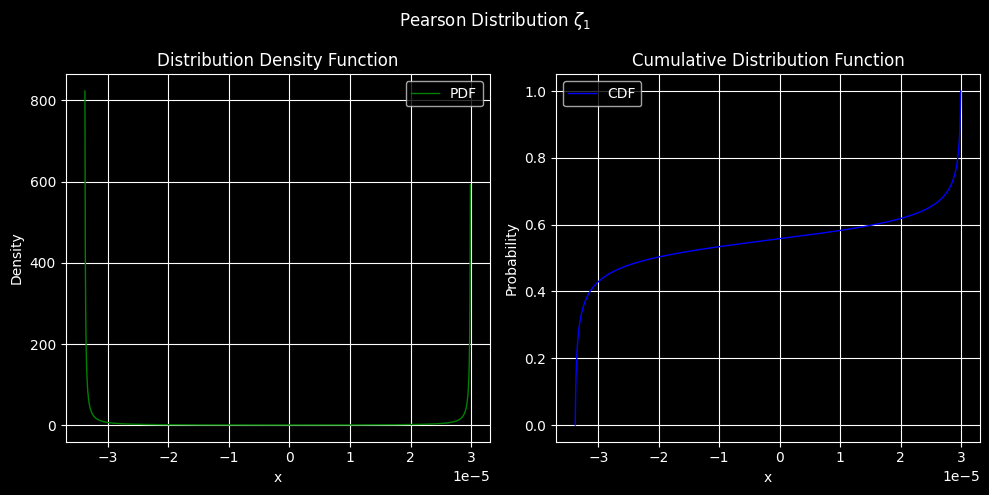

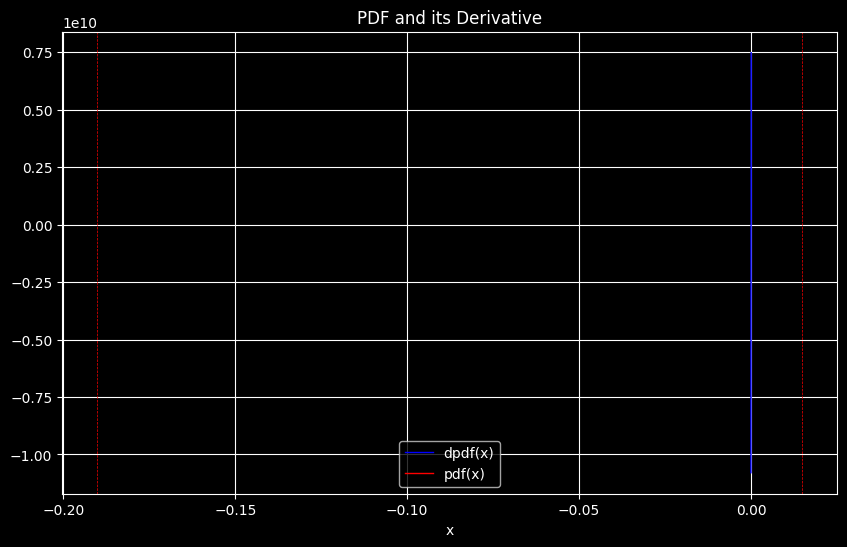

roots: [-0.19010619  0.01477239]
(lb, ub) = (-3.379908753755574e-05, 2.9897595137881537e-05)
pdf(-0.0000338) = 8.23e+02, pdf(0.0000299) = 5.92e+02


In [3]:
txt1 = "0,3.44591e-06,-5.19941e-10,3.60511e-11,-1.79542e-14,6.38754e-16,-6.77365e-19,1.41044e-20"
txt2 = "0,2.06927e-06,-5.32583e-10,1.36104e-11,-1.11958e-14,1.60294e-16,-2.6453e-19,2.45607e-21"
txt3 = "0,9.95035e-10,-1.84962e-15,2.97985e-18,-1.71485e-20,5.94496e-21,5.02299e-21,4.53677e-21"
txt4 = "0,6.39599e-08,-6.64175e-13,1.23031e-14,-2.63346e-19,1.492e-19,-8.52627e-22,7.96968e-24"
txt5 = "0,1.21694e-09,-2.58483e-15,4.4753e-18,-3.89871e-20,-5.49603e-22,-2.56297e-21,-5.44951e-21"
txt6 = "0,2.17722e-06,-5.77714e-10,1.50814e-11,-1.27811e-14,1.87228e-16,-3.21677e-19,3.03674e-21"
txt7 = "0,2.42547e-09,-8.13101e-15,1.77403e-17,4.25283e-21,1.09312e-20,-2.51119e-21,5.99685e-22"

txt = txt7
lines = [line.strip() for line in txt.split(',')]
mu = [float(line) for line in lines]

pearson = Pearson8(mu)
pprint(pearson.pfd) # print(pearson.mom)
print(f'a = {pearson.coef[0]:.7f}, scale = {pearson.pdf_obj.scale:.7f}')
print(f'type = {pearson.pdf_obj.pfd['type']}, isMax: {pearson.pdf_obj.is_max}')

lbub = pearson.determine_bounds()
x = np.linspace(lbub[0], lbub[1], 1000)
pdf = pearson.pdf(x); title = r'Pearson Distribution $\zeta_1$'
plot_pdf_cdf(x, pdf, title)

# Newton's method do not apply for these cases
dpdf = pearson.dpdf(x); title = 'PDF and its Derivative'
support = Support8(pearson.pdf_obj); roots = support.pdf_obj.ddpdf_roots()
plot_dpdf_pdf(x, dpdf, pdf, title, roots)
print(f'roots: {roots}')
print(f'(lb, ub) = ({support.lower_bound}, {support.upper_bound})')
print(f'pdf({lbub[0]:.7f}) = {pearson.pdf(lbub[0]):.2e}, pdf({lbub[1]:.7f}) = {pearson.pdf(lbub[1]):.2e}')

## Special Type 49: Bounds do not include -a

{'A1': np.float64(0.05207363648351551),
 'A2': np.float64(-0.07714536405380168),
 'A3': np.float64(0.019669323480504958),
 'A4': np.float64(0.00540240408978121),
 'type': 49,
 'x1': np.float64(-0.010827105540412215),
 'x2': np.float64(-0.005371270907202655),
 'x3': np.float64(0.004786454698084691),
 'x4': np.float64(0.010234662533947704)}
a = -0.0082584, scale = 0.0197986
type = 49, isMax: False
(lb, ub) = (-0.005371170907202655, 0.00478635469808469)


/Users/longan/PycharmProjects/pearsondist/src/pearsondist/support8.py:225: UserWarning: -a (=0.0082583650958911) > ub (0.00478635469808469)
  warnings.warn(f'-a (={-a}) > ub ({ub})')


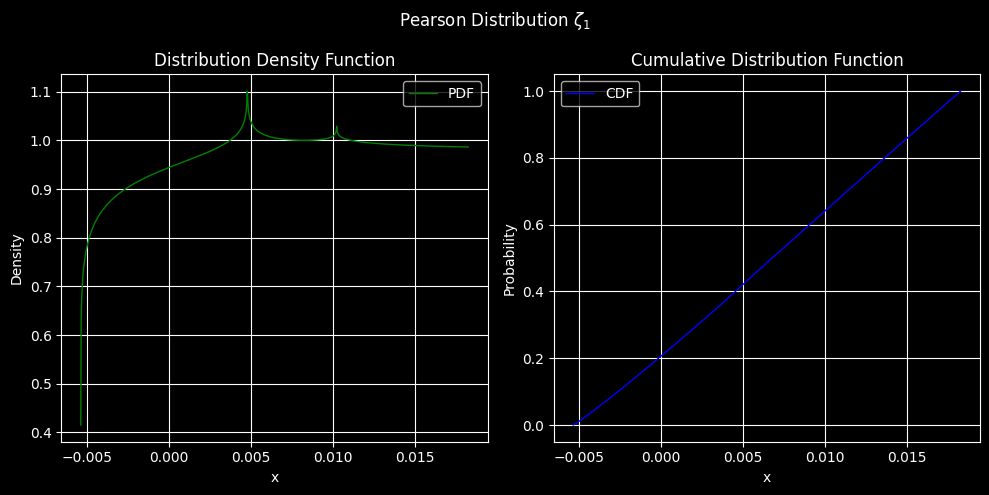

In [4]:
txt = "0,1.35924e-05,-2.09902e-09,5.56069e-10,-2.85442e-13,3.80848e-14,-4.05625e-17,3.20281e-18"
lines = [line.strip() for line in txt.split(',')]
mu = [float(line) for line in lines]

pearson = Pearson8(mu)
pprint(pearson.pfd)
print(f'a = {pearson.coef[0]:.7f}, scale = {pearson.pdf_obj.scale:.7f}')
print(f'type = {pearson.pdf_obj.pfd['type']}, isMax: {pearson.pdf_obj.is_max}')
support = Support8(pearson.pdf_obj)
print(f'(lb, ub) = ({support.lower_bound}, {support.upper_bound})')

lbub = pearson.determine_bounds()
x = np.linspace(lbub[0], lbub[1], 1000)
x = np.linspace(lbub[0], -pearson.coef[0]+0.01, 1000)

pdf = pearson.pdf_obj.pdf(x); title = r'Pearson Distribution $\zeta_1$'
plot_pdf_cdf(x, pdf, title)

## Special Type 49: -a argmax instead of argmin

the bound (lb, ub) = (-0.0282858, -0.0006019) which do not include 0 and -a.

It may be better to first check root type. If it is 49, use the four different
roots x1, x2, x3, x4 to determine the bounds.

Therefore, when variance is very small, problems arise with large probability.

So, for these situations, it is better to resort to Euler approximation.

{'A1': np.float64(-0.20340257735326772),
 'A2': np.float64(0.48713863694449544),
 'A3': np.float64(-0.28379459190688466),
 'A4': np.float64(5.85323156568994e-05),
 'type': 49,
 'x1': np.float64(-0.0008230444076468342),
 'x2': np.float64(-6.733091194746406e-05),
 'x3': np.float64(0.0007269910742959774),
 'x4': np.float64(1.2250714724633498)}
a = 0.0041589, scale = 0.0084831
type = 49, isMax: True
(lb, ub) = (-6.723091194746406e-05, 0.0007268910742959775)


/Users/longan/PycharmProjects/pearsondist/src/pearsondist/support8.py:223: UserWarning: -a (=-0.0041588744336359465) < lb (-6.723091194746406e-05)
  warnings.warn(f'-a (={-a}) < lb ({lb})')


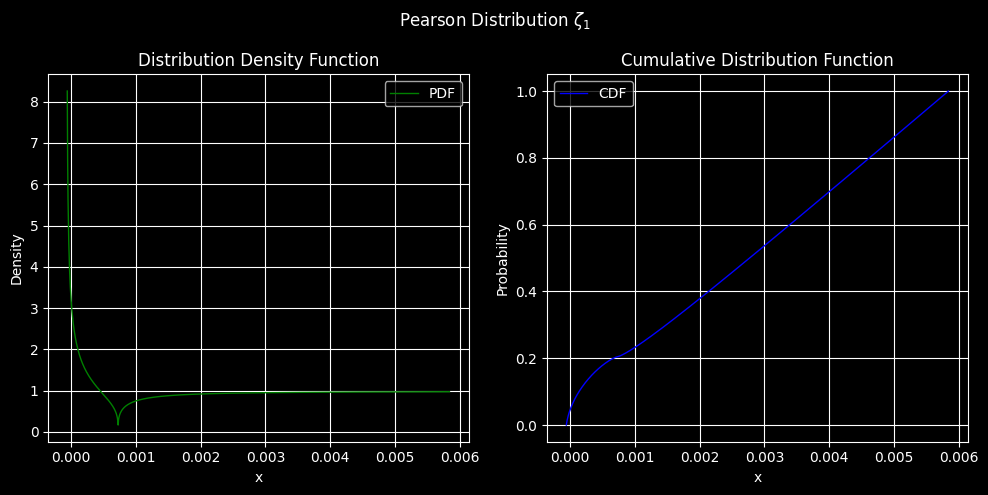

roots: [ 8.17339563e-01 -6.16945580e-03 -6.01931300e-04  4.92050173e-04]


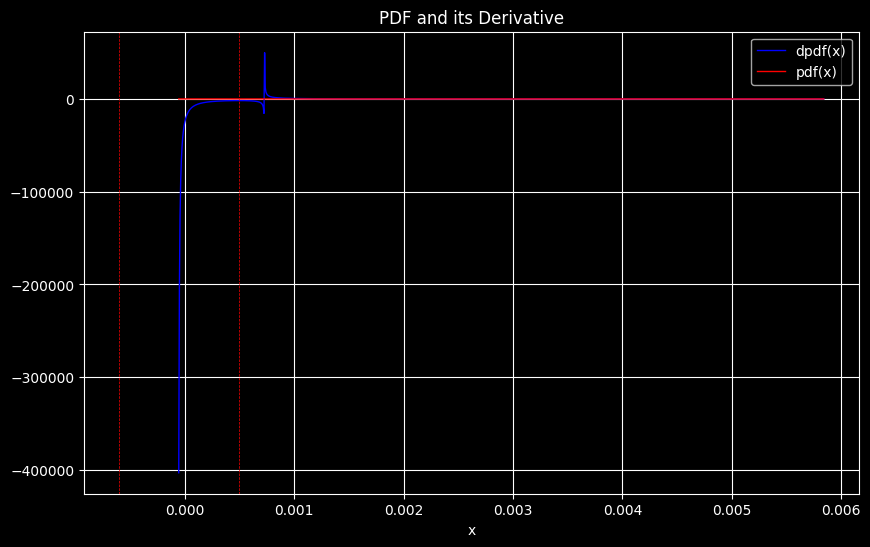

In [5]:
txt = "0,9.82083e-08,-3.72319e-12,2.95777e-14,-3.6821e-18,1.68639e-20,5.51479e-21,6.00816e-21"
lines = [line.strip() for line in txt.split(',')]
mu = [float(line) for line in lines]

pearson = Pearson8(mu)
pprint(pearson.pfd) # print(pearson.mom)
print(f'a = {pearson.coef[0]:.7f}, scale = {pearson.pdf_obj.scale:.7f}')
print(f'type = {pearson.pdf_obj.pfd['type']}, isMax: {pearson.pdf_obj.is_max}')
support = Support8(pearson.pdf_obj)
print(f'(lb, ub) = ({support.lower_bound}, {support.upper_bound})')

# lbub = pearson.determine_bounds()
lbub = (-0.0282858, -0.0006019)
lbub = (pearson.pfd['x2']+1e-5, -pearson.coef[0]+0.01)
# lbub = (pearson.pfd['x2']+1e-5, pearson.pfd['x3']-1e-5)
x = np.linspace(lbub[0], lbub[1], 1000)

pdf = pearson.pdf_obj.pdf(x); title = r'Pearson Distribution $\zeta_1$'
plot_pdf_cdf(x, pdf, title)
dpdf = pearson.dpdf(x); title = 'PDF and its Derivative'
support8 = Support8(pearson.pdf_obj); roots = support8.pdf_obj.ddpdf_roots()
print(f'roots: {roots}')
plot_dpdf_pdf(x, dpdf, pdf, title, roots)

{'A1': np.float64(0.05207363648351551),
 'A2': np.float64(-0.07714536405380168),
 'A3': np.float64(0.019669323480504958),
 'A4': np.float64(0.00540240408978121),
 'type': 49,
 'x1': np.float64(-0.010827105540412215),
 'x2': np.float64(-0.005371270907202655),
 'x3': np.float64(0.004786454698084691),
 'x4': np.float64(0.010234662533947704)}
a = -0.0082584, scale = 0.0197986
type = 49, isMax: False
(lb, ub) = (-0.005371170907202655, 0.00478635469808469)


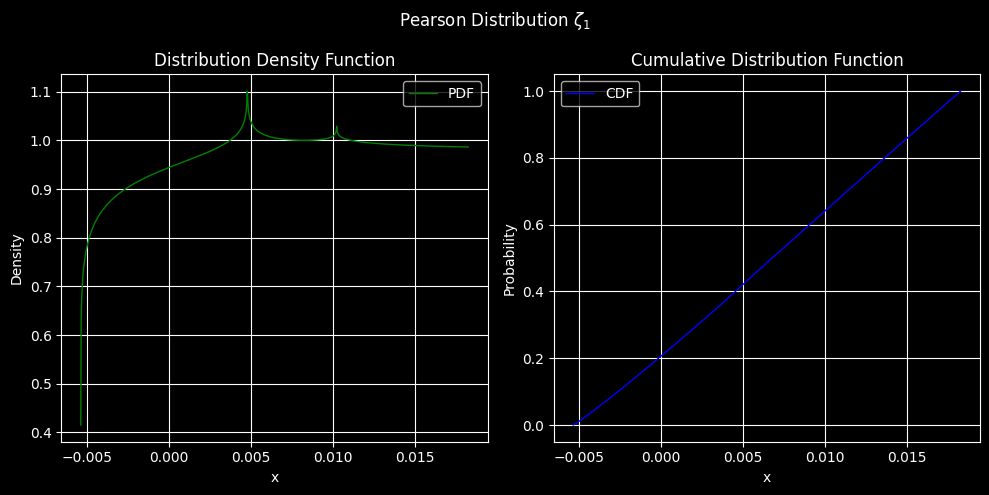

In [12]:
txt = "0,1.35924e-05,-2.09902e-09,5.56069e-10,-2.85442e-13,3.80848e-14,-4.05625e-17,3.20281e-18"
lines = [line.strip() for line in txt.split(',')]
mu = [float(line) for line in lines]

pearson = Pearson8(mu)
pprint(pearson.pfd)
print(f'a = {pearson.coef[0]:.7f}, scale = {pearson.pdf_obj.scale:.7f}')
print(f'type = {pearson.pdf_obj.pfd['type']}, isMax: {pearson.pdf_obj.is_max}')
support = Support8(pearson.pdf_obj)
print(f'(lb, ub) = ({support.lower_bound}, {support.upper_bound})')

lbub = pearson.determine_bounds()
x = np.linspace(lbub[0], lbub[1], 1000)
x = np.linspace(lbub[0], -pearson.coef[0]+0.01, 1000)

pdf = pearson.pdf_obj.pdf(x); title = r'Pearson Distribution $\zeta_1$'
plot_pdf_cdf(x, pdf, title)

## Type = 42

{'A1': np.float64(-0.2208657820015762),
 'A2': np.float64(0.2208657820015762),
 'B1': np.float64(-0.012848022409502597),
 'B2': np.float64(0.007835126956779338),
 'type': 42,
 'x1': np.complex128(-0.006166499261581072+0.002912740101133957j),
 'x2': np.complex128(0.005181785219822856+0.002406485575266896j)}
a = -0.00023610619047150834, scale = 8.73647183503681
iteration: 0, x0 =   -0.0053342
iteration: 1, x0 =   -0.0061576
iteration: 2, x0 =   -0.0069234
iteration: 3, x0 =   -0.0077509
iteration: 4, x0 =   -0.0087740
iteration: 5, x0 =   -0.0102349
iteration: 6, x0 =   -0.0127350
iteration: 7, x0 =   -0.0183214
iteration: 0, x0 =    0.0054368
iteration: 1, x0 =    0.0061289
iteration: 2, x0 =    0.0069072
iteration: 3, x0 =    0.0079199
iteration: 4, x0 =    0.0094567
iteration: 5, x0 =    0.0122878
iteration: 6, x0 =    0.0192890


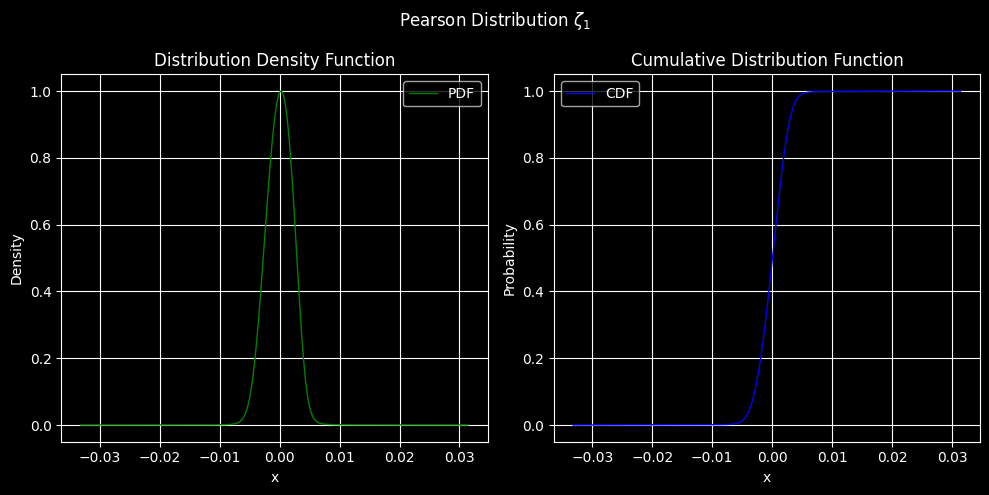

iteration: 0, x0 =   -0.0053342
iteration: 1, x0 =   -0.0061576
iteration: 2, x0 =   -0.0069234
iteration: 3, x0 =   -0.0077509
iteration: 4, x0 =   -0.0087740
iteration: 5, x0 =   -0.0102349
iteration: 6, x0 =   -0.0127350
iteration: 7, x0 =   -0.0183214
iteration: 0, x0 =    0.0054368
iteration: 1, x0 =    0.0061289
iteration: 2, x0 =    0.0069072
iteration: 3, x0 =    0.0079199
iteration: 4, x0 =    0.0094567
iteration: 5, x0 =    0.0122878
iteration: 6, x0 =    0.0192890
roots: [ 0.00283645 -0.00254904]
isMax: True


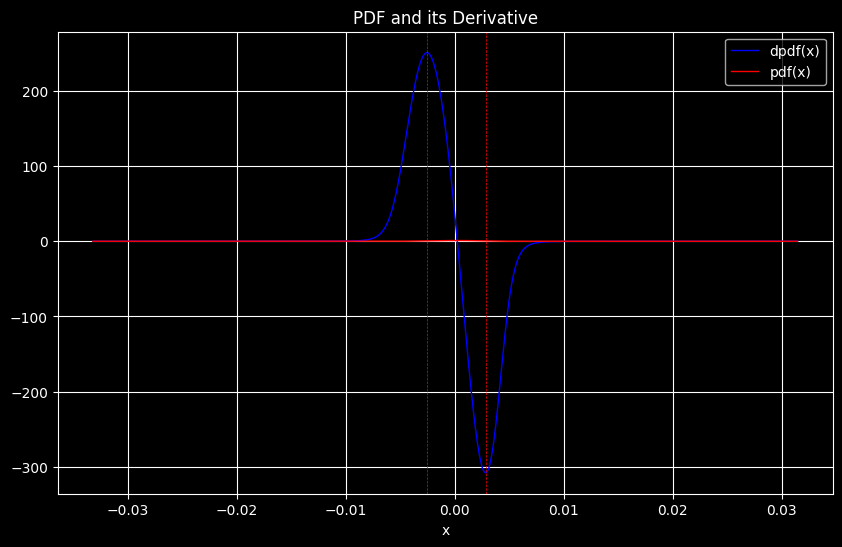

pdf(-0.0331856) = 1.29e-04, pdf(0.0314403) = 2.51e-04


In [13]:
txt1 = '''           0
  2.8948e-06
-9.09822e-10
 2.68043e-11
-2.67988e-14
 4.47215e-16
-8.87785e-19
 9.72059e-21'''

txt2 = '''          0
 3.19957e-06
-1.06657e-09
 3.28105e-11
-3.47403e-14
 6.07461e-16
-1.27473e-18
 1.46639e-20'''

txt3 = '''          0
 4.99408e-06
-1.26248e-09
 7.67366e-11
-6.33023e-14
 2.02988e-15
-3.41014e-18
 6.76261e-20'''

txt = txt3
lines = [line.strip() for line in txt.split('\n')]
mu = [float(line) for line in lines]
pearson = Pearson8(mu)
pprint(pearson.pfd) # print(pearson.mom)
print(f'a = {pearson.coef[0]}, scale = {pearson.pdf_obj.scale}') # print("coef: ", pearson.coef)
lbub = pearson.determine_bounds()
# lbub = (-0.05, 0.01)
x = np.linspace(lbub[0], lbub[1], 1000)

pdf = pearson.pdf_obj.pdf(x); title = r'Pearson Distribution $\zeta_1$'
plot_pdf_cdf(x, pdf, title)
dpdf = pearson.dpdf(x); title = 'PDF and its Derivative'
support8 = Support8(pearson.pdf_obj); roots = support8.pdf_obj.ddpdf_roots()
print(f'roots: {roots}')
print(f'isMax: {support8.pdf_obj.is_max}')
plot_dpdf_pdf(x, dpdf, pdf, title, roots)

print(f'pdf({lbub[0]:.7f}) = {pearson.pdf(lbub[0]):.2e}, pdf({lbub[1]:.7f}) = {pearson.pdf(lbub[1]):.2e}')